In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(1)]
csv_list = ['census', 'mobile']
times_list = [str(int(3600/4 * (i + 1))) for i in range(6*2)]
area_one_length = 9

In [4]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = math.floor(r[2])
        
    return base

In [5]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [6]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'detail4/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                     index_col=0,
                                                    encoding='Shift_JISx0213')
            df = df.iloc[0:1214, :]
            csv_array[_dir][_seed][_csv] = df

In [7]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + 'detail4/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                     index_col=0,
                                                    encoding='Shift_JISx0213')
            df = df.iloc[0:1214, :]
            df['people'] = df['people'].apply(lambda x: int(x))
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _times, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                df = df.sort_index(ascending=False)
                csv_array[_dir][_seed][_csv][_times] = df

In [8]:
people = 'people30000'
seed = '123'
csv = 'mobile'
time = '900'
df = csv_array[people][seed][csv][time].copy()
df

,00,10,20,30,40,50,60,70,80
8,0.0,0.0,0.0,2.0,27.0,0.0,0.0,4.0,0.0
7,0.0,0.0,9.0,6.0,48.0,8.0,25.0,0.0,0.0
6,0.0,0.0,3.0,17.0,223.0,60.0,12.0,0.0,0.0
5,0.0,0.0,5.0,31.0,827.0,549.0,0.0,0.0,0.0
4,0.0,3.0,19.0,19.0,691.0,705.0,17.0,2.0,0.0
3,0.0,0.0,5.0,98.0,148.0,19.0,3.0,1.0,0.0
2,12.0,42.0,19.0,34.0,2.0,0.0,0.0,0.0,0.0
1,0.0,4.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def create_contour(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

900
3712.0


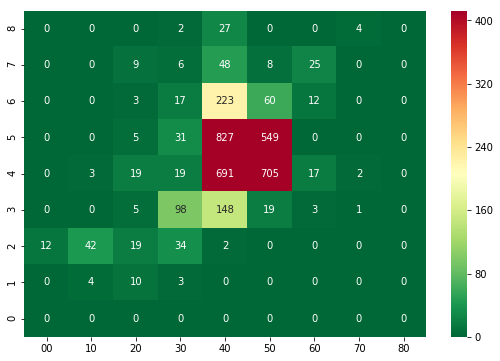

In [29]:
time = times_list[0]
print(time)
print(csv_array[people][seed][csv][time].sum().sum())
df = csv_array[people][seed][csv][time].copy()
create_contour(df)

1800
4487.0


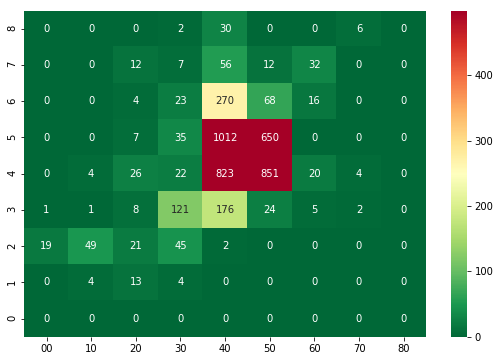

In [30]:
time = times_list[1]
print(time)
print(csv_array[people][seed][csv][time].sum().sum())
df = csv_array[people][seed][csv][time].copy()
create_contour(df)

2700
4969.0


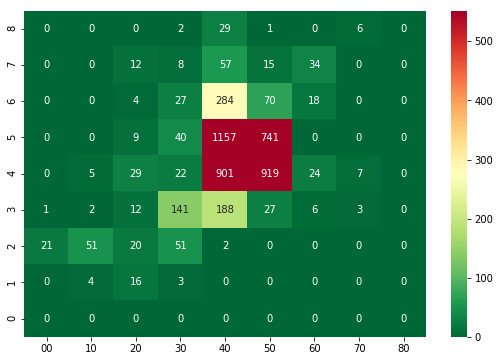

In [31]:
time = times_list[2]
print(time)
print(csv_array[people][seed][csv][time].sum().sum())
df = csv_array[people][seed][csv][time].copy()
create_contour(df)

In [16]:
csv_array_percent = {}
for _dir in dir_list:
    csv_array_percent[_dir] = {}
    for _seed in seed_list:
        csv_array_percent[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_percent[_dir][_seed][_csv] = {}
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
                df /= df.sum().sum()
                csv_array_percent[_dir][_seed][_csv][_times] = df

In [22]:
def create_contour_percent(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)

900
1.0


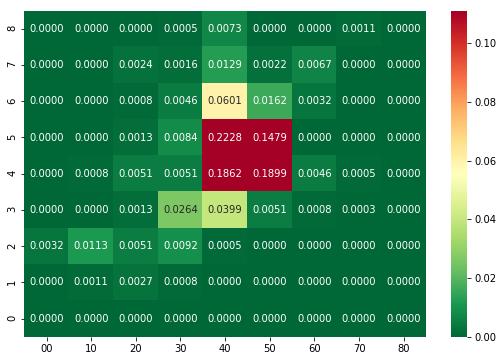

In [25]:
time = times_list[0]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

1800


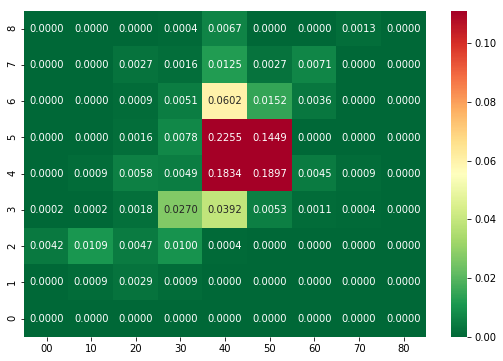

In [24]:
time = times_list[1]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

In [17]:
csv_array_diff = {}
for _dir in dir_list:
    csv_array_diff[_dir] = {}
    for _seed in seed_list:
        csv_array_diff[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff[_dir][_seed][_csv] = {}
            for index, _times in enumerate(times_list):
                df = csv_array_percent[_dir][_seed][_csv][_times].copy()
                if _times != times_list[0]:
                    df_diff = csv_array_percent[_dir][_seed][_csv][times_list[index-1]]
                    df /= df_diff
                    df = df.replace(np.inf,np.nan).fillna(0)
                csv_array_diff[_dir][_seed][_csv][_times] = df
#                 df.to_csv(root_dir + 'next_move_area_mobile_census/' + _dir + 'seed' + _seed + '_' + _csv + _times + '.csv')

In [19]:
def create_contour_diff(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn_r',
               vmax=1.5, vmin=0.5)

1800


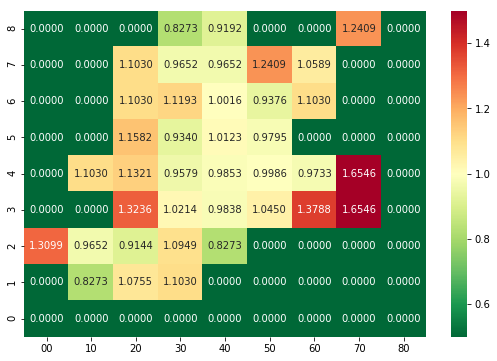

In [20]:
time = times_list[1]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

2700


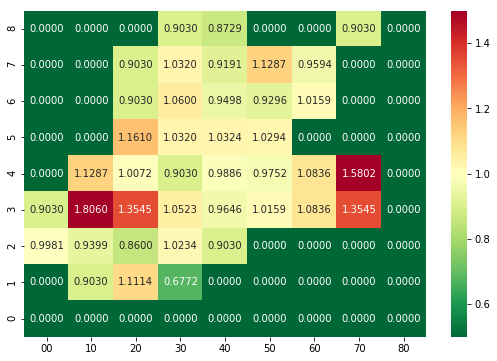

In [21]:
time = times_list[2]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

In [36]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    mobile = csv_array[people][seed]['mobile'][times_list[time_number-1]]
    census = csv_array_diff[people][seed]['mobile'][time]
    print(census.sum().sum())
    corrected = census * mobile
    create_contour(corrected)
    print('補正値合計:   ',corrected.sum().sum())
    print('ノーマル合計: ',csv_array[people][seed]['mobile'][time].sum().sum())

1800
40.99849602970019
補正値合計:    3710.3454423891244
ノーマル合計:  4487.0


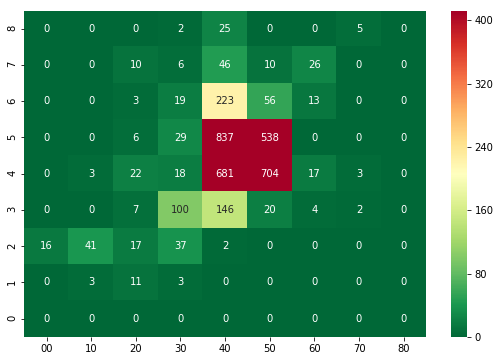

In [37]:
create_corrected(1)

2700
41.351023131225816
補正値合計:    4486.097001408733
ノーマル合計:  4969.0


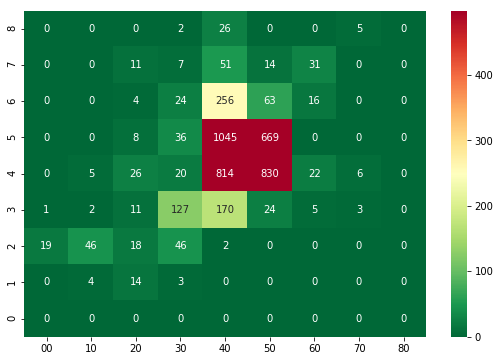

In [38]:
create_corrected(2)

3600
40.69876910195019
補正値合計:    4969.000000000001
ノーマル合計:  5242.0


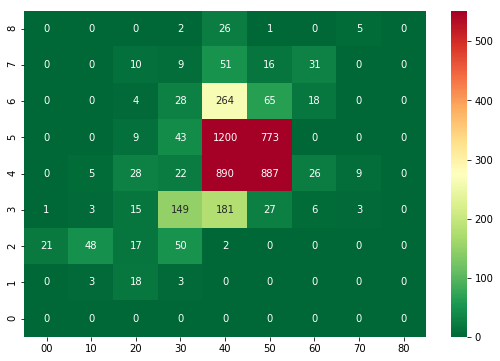

In [39]:
create_corrected(3)